**Original Article:** [Human resident liver myeloid cells protect against metabolic stress in obesity,"Nature Metabolism.", 2023 ](https://doi.org/10.1038/s42255-023-00834-7)

**Package:** [scCAMEL-SWAPLINE.v1](https://pubmed.ncbi.nlm.nih.gov/35675414/)

In [1]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d}"
today

'2023-01-16'

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.utils.data as data_utils
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import torch.nn.functional as F
import math
#import gpytorch

import urllib.request
import os.path
from scipy.io import loadmat
from math import floor
import anndata
# Make plots inline
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['floor']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
torch.manual_seed(1)    # reproducible

In [4]:
import scCAMEL as scm
from scCAMEL import CamelPrefiltering
from scCAMEL import CamelSwapline
from scCAMEL import CamelEvo

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelSwapline.py:534: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def addcolor(datax,clustername="Cluster", colorcode="color", predef=pd.Series()):


In [26]:
screfall=anndata.read("LiverMacrophage_474cells_Ref2023-01-16_MergeCluster_35epch.h5ad")
screfall

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster'

In [28]:
set(screfall.obs["Cluster"])

{'LM1', 'LM2-C1', 'LM2-C2', 'LM3', 'LM4'}

In [29]:
scref=screfall

In [30]:
set(scref.obs["Cluster"])

{'LM1', 'LM2-C1', 'LM2-C2', 'LM3', 'LM4'}

In [31]:
scref.obs.groupby(["Cluster"]).count()

,cellID
Cluster,
LM1,133
LM2-C1,39
LM2-C2,73
LM3,96
LM4,133


In [35]:
scref.X=scref.X.todense()

In [36]:
path='/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
#dfpfc2= prefilteringTest.prefilter(df_f=dfpfc,filename=filename, path=path)
#scref= scm.CamelPrefiltering.prefilter(datax=scref,filename=filename, path=path)

In [37]:
scref=scm.CamelPrefiltering.DataScaling(scref)

In [38]:
scref.var['Filter1']=[True]*scref.var.shape[0]
scref

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster'
    var: 'Filter1'

In [43]:
scref=CamelPrefiltering.SelectFeatures(datax=scref, clustername='Cluster',methodname='wilcoxon', numbergenes=1000, folderchange=1.5)

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarn

In [45]:
########################################################
########################################################
#remeber to change the file path in tftable
########################################################
########################################################
scref =scm.CamelPrefiltering.LabelGene_Scaling(datax=scref,
                                                                TPTT=100000,     mprotogruop=scref.obs["Cluster"].values,commongene=None,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="(file path to tftable)/FantomTF2CLUSTER_human_official.txt", learninggroup="train")



CamelRunning---GenesScaling......


C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:576: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:577: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:579: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py39\lib\site-packages\scCAMEL\CamelPrefiltering.py:580: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_de

CamelRunning---TrainingGenesScaling......Finished


In [46]:
scref

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'rank_genes_groups', 'train_set_gene', 'mclasses_names'
    obsm: 'train_set_values'

In [47]:
len(scref.var.index[scref.var["MVgene"]])

3987

In [48]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=200,
    learningRate=0.03,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cuda.......
CamelRunning---NNclasffier_in_cuda.......Finished



#Accuracy plot, the overall clustering accuracy is ~85%

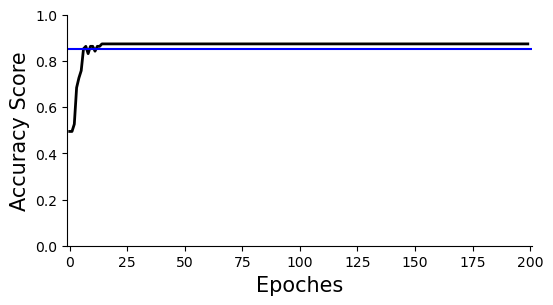

In [52]:
ax=scm.CamelPrefiltering.AccuracyPlot( nnModel=net, accCutoff=0.85,
                 Xlow=-1, Ylow=0.0, Yhigh=1,
               )
plt.savefig("upload_%s_CurvePlot_learningAccuracy.pdf"%today,bbox_inches='tight')

In [53]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=35,
    learningRate=0.03,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cuda.......
CamelRunning---NNclasffier_in_cuda.......Finished


In [54]:
scref

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'rank_genes_groups', 'train_set_gene', 'mclasses_names'
    obsm: 'train_set_values'

In [56]:
#if color is not defined
scref=scm.CamelSwapline.addcolor(datax=scref,clustername="Cluster", colorcode="color")

In [57]:
scref

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster', 'mtrain_index', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'rank_genes_groups', 'train_set_gene', 'mclasses_names', 'refcolor_dict'
    obsm: 'train_set_values'

In [58]:
set(scref.obs["Cluster"])

{'LM1', 'LM2-C1', 'LM2-C2', 'LM3', 'LM4'}

In [ ]:
LM1: #ABD9E9
LM2-C1 (use name LM2): #2C7BB6
LM2-C2 (use name cDC2): purple
LM3: #FDAE61
LM4: #D7191C


In [59]:
clist=[]
for item in scref.obs["Cluster"]:
    if item=="LM1":
        clist.append("#ABD9E9")
    elif item=="LM2-C2":
        clist.append("#2C7BB6")
    elif item=="LM2-C1":
        clist.append("purple")
    elif item=="LM3":
        clist.append("#FDAE61")
    elif item=="LM4":
        clist.append("#D7191C")

In [60]:
scref.obs["color"]=clist

In [61]:
scref.uns['refcolor_dict']={'LM2-C1': [44, 123, 182],
 'LM2-C2': [143, 0, 255],
 "LM3": [253,174,97],
                           "LM4": [215,25,28],
 'LM1': [171, 217, 233],
                           }

In [62]:
scref.uns["mwanted_order"] =list(sort(list(set(scref.obs["Cluster"]))))

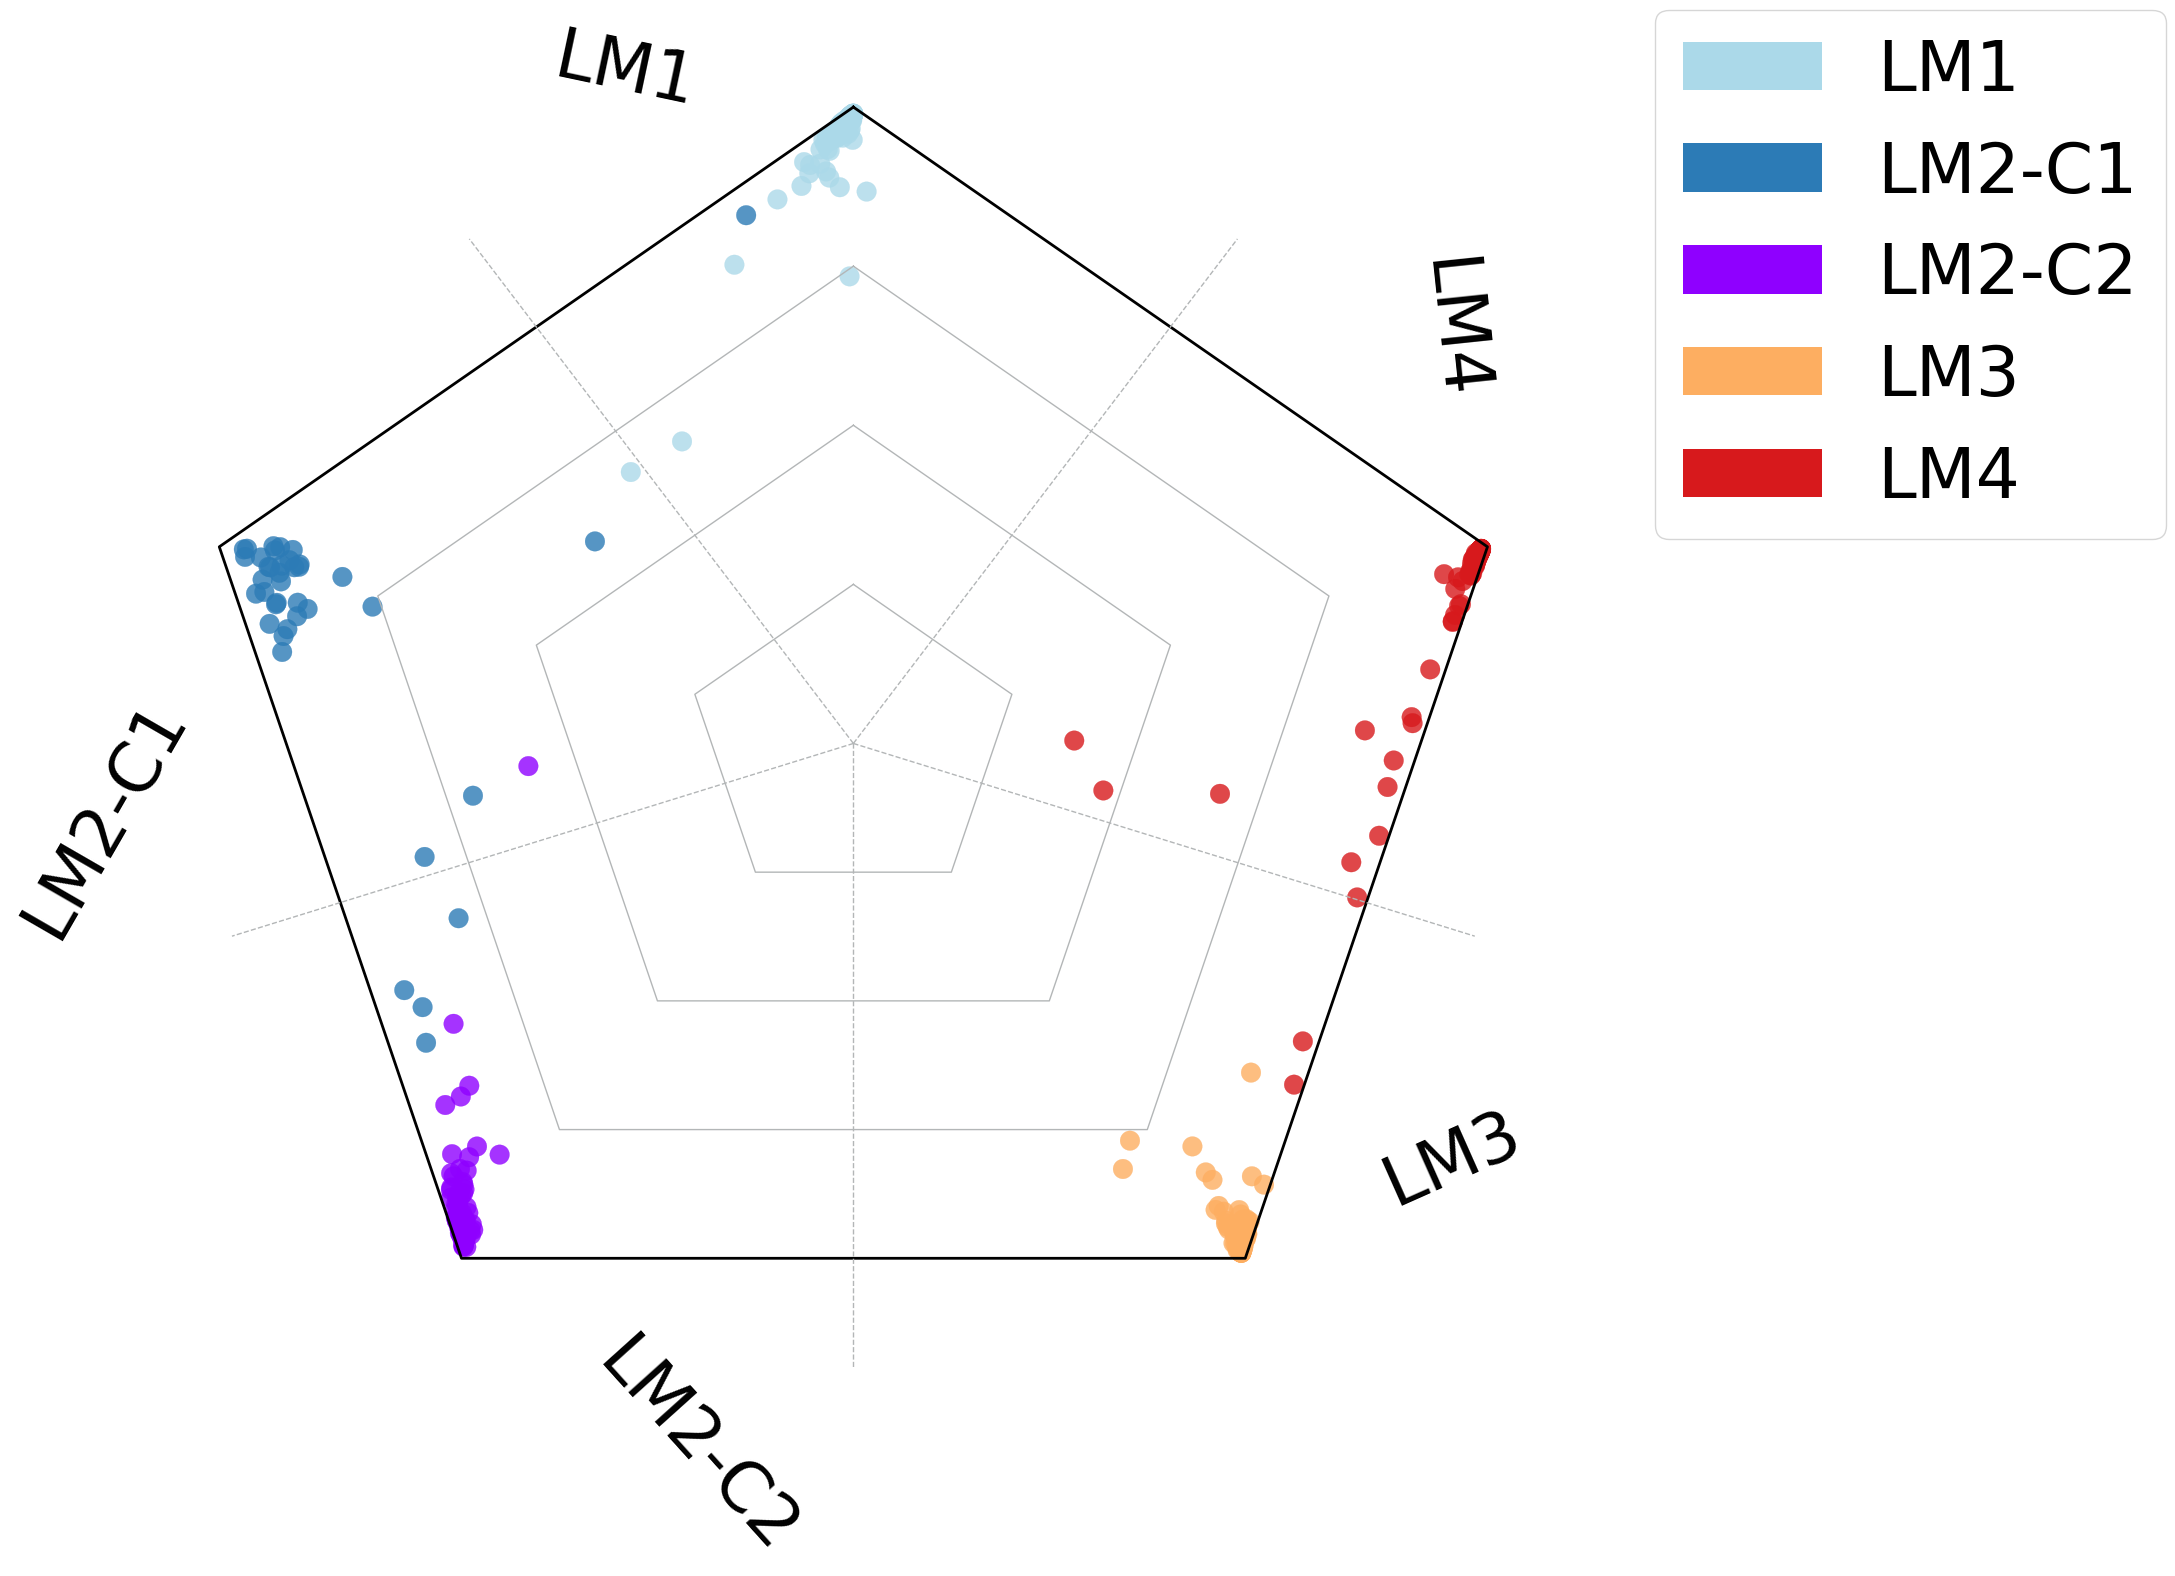

In [64]:
scref=scm.CamelSwapline.prediction(datax=scref, mcolor_dict=scref.uns["refcolor_dict"] ,net=net,learninggroup="train", radarplot=True,fontsizeValue=18,
                       ncolnm=3, bbValue=(1.2, 1.05)  )
plt.savefig("upload_%s_RadarPlot_Merged_cluster.pdf"%today,bbox_inches='tight')

In [65]:
scref

AnnData object with n_obs × n_vars = 474 × 21397
    obs: 'cellID', 'Cluster', 'mtrain_index', 'color'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'rank_genes_groups', 'train_set_gene', 'mclasses_names', 'refcolor_dict', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [70]:
#work_dir=""
#filename="%s_Ref%s_MergeCluster_35epch.h5ad"%("LiverMacrophageNNlearned",today)

In [71]:
os.path.join(work_dir,filename)

'/Dropbox/data/proj/PE_HYZ/PublicDataSet/Liver_Macrophage/LiverMacrophageNNlearned_Ref2022-12-21_MergeCluster_35epch.h5ad'

In [72]:
scm.CamelSwapline.writedata(adatax=scref,filename=filename,filepath=work_dir)

In [196]:
scref.obs.to_csv("Metatable.csv",sep=",")